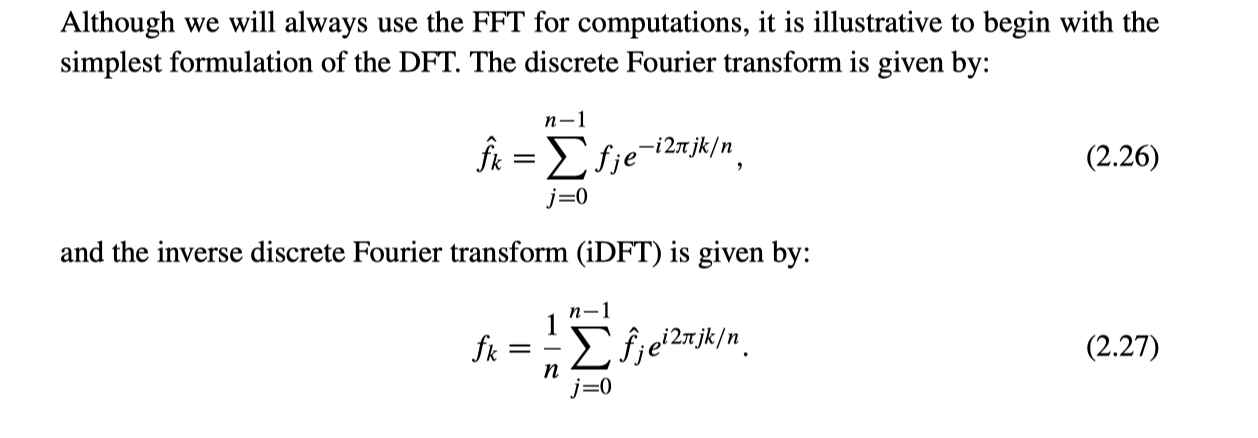
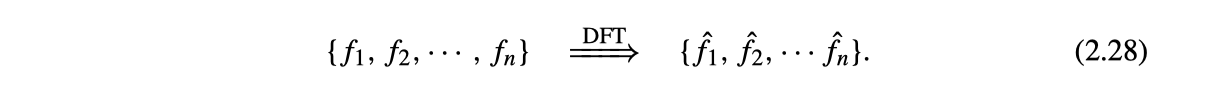
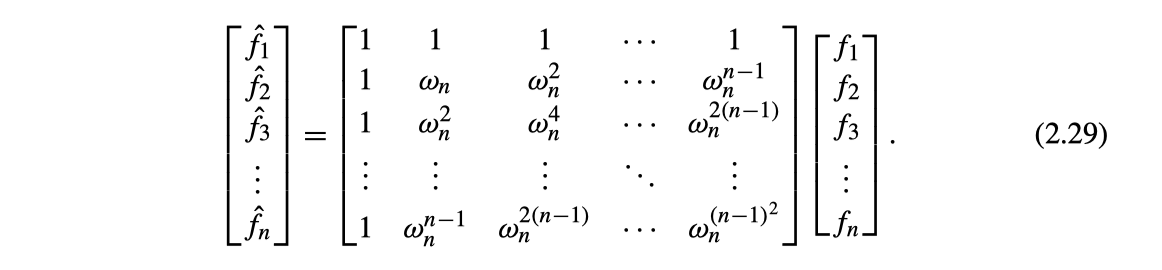

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

n = 256
w = np.exp(-1j * 2 * np.pi / n)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


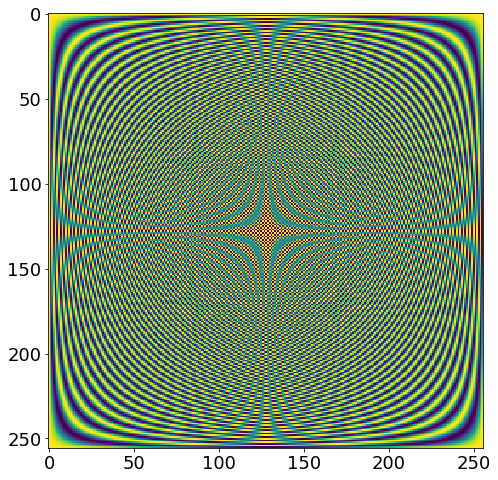

In [5]:
DFT = np.zeros((n,n))

# Slow
for i in range(n):
    for k in range(n):
        DFT[i,k] = w**(i*k)
        
DFT = np.real(DFT)
        
plt.imshow(DFT)
plt.show()

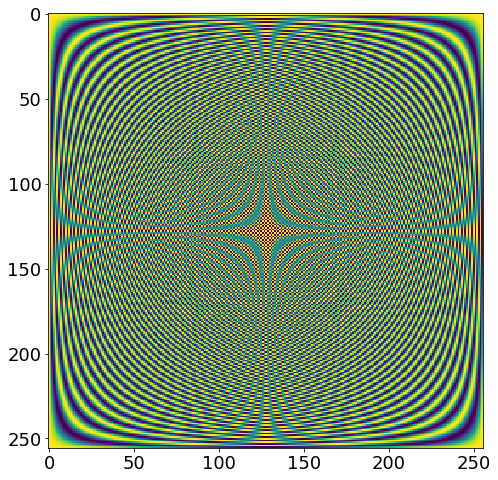

In [6]:
# Fast
J,K = np.meshgrid(np.arange(n),np.arange(n))
DFT = np.power(w,J*K)
DFT = np.real(DFT)
       
plt.imshow(DFT)
plt.show()

In [25]:
# check if DFT multiplied by iDFT (calculated by 2.27) is Identity matrix
n = 256
w = np.exp(-1j * 2 * np.pi / n)
w2 = np.exp(+1j * 2 * np.pi / n)
J,K = np.meshgrid(np.arange(n),np.arange(n))
DFT = np.power(w,J*K)

iDFT = (1/n)*np.power(w2,J*K)
M = np.abs(iDFT@DFT-np.eye(n))
if M.all()<0.00000001:
    print("DFT @ iDFT = Identity matrix")
else:
    print("False")

DFT @ iDFT = Identity matrix


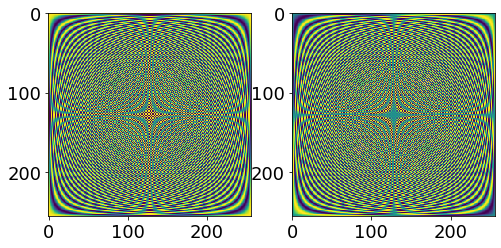

In [7]:
# Fast
fig1,axs1 = plt.subplots(1,2)
J,K = np.meshgrid(np.arange(n),np.arange(n))
DFT = np.power(w,J*K)
DFT1 = np.real(DFT)
DFT2 = np.imag(DFT)
       
axs1[0].imshow(DFT1)
axs1[1].imshow(DFT2)
plt.show()

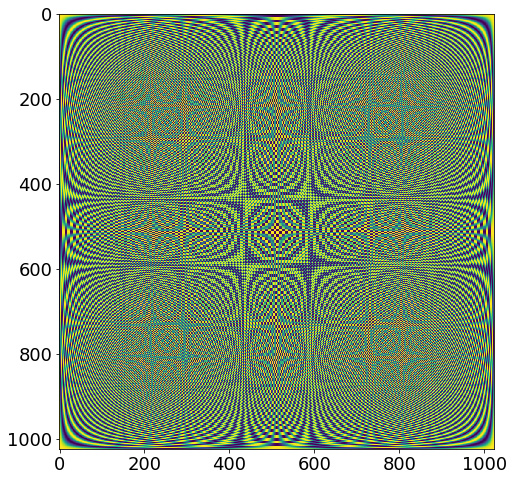

In [11]:
n = 1024
w = np.exp(-1j * 2 * np.pi / n)
J,K = np.meshgrid(np.arange(n),np.arange(n))
DFT = np.power(w,J*K)
DFT = np.real(DFT)
       
plt.imshow(DFT)
plt.show()

In [8]:
t = np.linspace(0, 0.5, 500)
s = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)

In [9]:
n = len(t)
J,K = np.meshgrid(np.arange(n),np.arange(n))
DFT = np.power(w,J*K)
fhat = DFT @ s
x_approx = np.linalg.inv(DFT) @ fhat

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


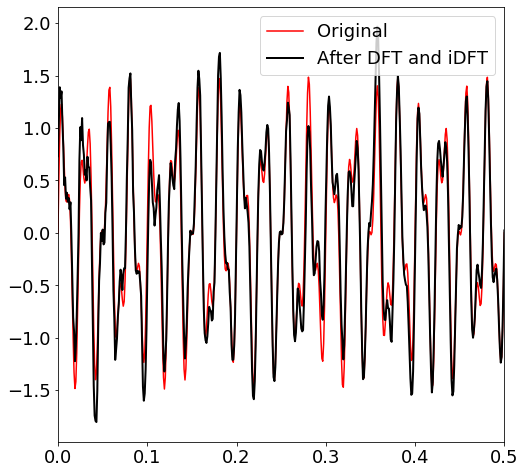

In [10]:
## Plots
fig,axs = plt.subplots(1,1)

plt.plot(t,s,color='r',LineWidth=1.5,label='Original')
plt.plot(t,x_approx,color='k',LineWidth=2,label='After DFT and iDFT')
plt.xlim(t[0],t[-1])
plt.legend()

plt.show()

In [12]:
J,K = np.meshgrid(np.arange(3),np.arange(3))
print(J)
print(K)
w = 2
print(J*K)
DFT = np.power(w,J*K)
print(DFT)

[[0 1 2]
 [0 1 2]
 [0 1 2]]
[[0 0 0]
 [1 1 1]
 [2 2 2]]
[[0 0 0]
 [0 1 2]
 [0 2 4]]
[[ 1  1  1]
 [ 1  2  4]
 [ 1  4 16]]
